<a href="https://colab.research.google.com/github/junweiluo/HandsonMLPractice/blob/master/Chapter14Ex03_Pretrained_ResNet50.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

try:
    # %tensorflow_version only exists in Colab.
    %tensorflow_version 2.x
    IS_COLAB = True
except Exception:
    IS_COLAB = False

# TensorFlow ≥2.0 is required
import tensorflow as tf
from tensorflow import keras
assert tf.__version__ >= "2.0"

if not tf.config.list_physical_devices('GPU'):
    print("No GPU was detected. CNNs can be very slow without a GPU.")
    if IS_COLAB:
        print("Go to Runtime > Change runtime and select a GPU hardware accelerator.")

# Common imports
import numpy as np


# to make this notebook's output stable across runs
np.random.seed(42)
tf.random.set_seed(42)

In [0]:
# To plot pretty figures
%matplotlib inline
#import matplotlib as mpl
import matplotlib.pyplot as plt

#def plot_image(image):
#    plt.imshow(image, cmap="gray", interpolation="nearest")
#    plt.axis("off")

def plot_color_image(image):
    plt.imshow(image, interpolation="nearest")
    plt.axis("off")

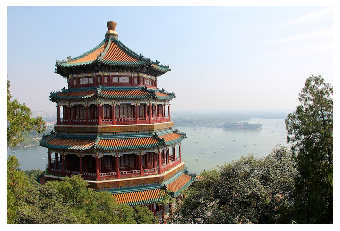

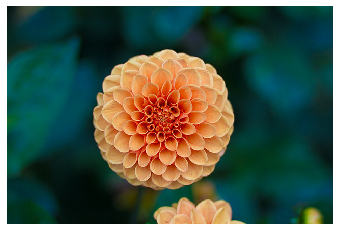

In [3]:
# Load sample images (original)
from sklearn.datasets import load_sample_image
china = load_sample_image("china.jpg") / 255
flower = load_sample_image("flower.jpg") / 255
images = np.array([china, flower])
batch_size, height, width, channels = images.shape
# original pictures
plot_color_image(images[0])
plt.show()
plot_color_image(images[1])
plt.show()

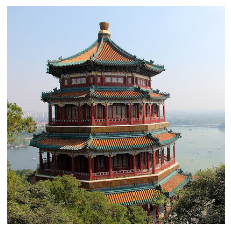

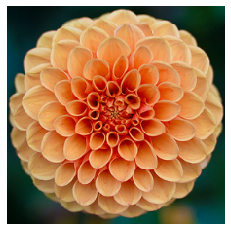

In [4]:
# resize pictures for input to resnet50 model

china_box = [0, 0.03, 1, 0.68]
flower_box = [0.19, 0.26, 0.86, 0.7]
images_resized = tf.image.crop_and_resize(images, [china_box, flower_box], [0, 1], [224, 224])
plot_color_image(images_resized[0])
plt.show()
plot_color_image(images_resized[1])
plt.show()

In [0]:
model = keras.applications.resnet50.ResNet50(weights="imagenet")

In [6]:
model.summary() # This requires a certain size to input.  Therefore it is important to resize in previous steps.

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
___________________________________________________________________________________________

In [0]:
inputs = keras.applications.resnet50.preprocess_input(images_resized * 255)
Y_proba = model.predict(inputs) # this is the only step needed to run the prediction.

In [8]:
Y_proba.shape

(2, 1000)

In [9]:
Y_proba # This is the prob for 1000 classes.

array([[7.35484873e-09, 2.15530420e-08, 7.46990114e-09, ...,
        1.70624403e-09, 1.11732945e-07, 3.38287549e-08],
       [2.34770567e-07, 7.02710258e-06, 4.04799692e-07, ...,
        5.40220863e-05, 3.66757049e-05, 1.33723166e-04]], dtype=float32)

In [24]:
# find out top 3 using numpy.

print(np.sort(Y_proba[0])[::-1][:3], np.sort(Y_proba[1])[::-1][:3])

[0.4339358 0.4307449 0.1169505] [0.5396468  0.09524133 0.04966439]


In [10]:
top_K = keras.applications.resnet50.decode_predictions(Y_proba, top=3)
for image_index in range(len(images)):
    print("Image #{}".format(image_index))
    for class_id, name, y_proba in top_K[image_index]:
        print("  {} - {:12s} {:.2f}%".format(class_id, name, y_proba * 100))
    print()

Image #0
  n03877845 - palace       43.39%
  n02825657 - bell_cote    43.07%
  n03781244 - monastery    11.70%

Image #1
  n04522168 - vase         53.96%
  n07930864 - cup          9.52%
  n11939491 - daisy        4.97%



Below is showing how to do data augmentation for various inputs.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


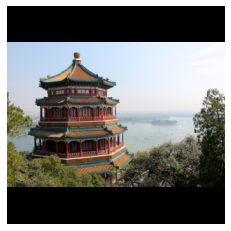

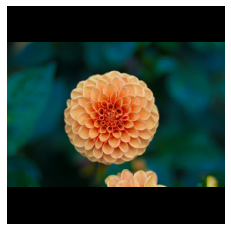

In [11]:
# padded
images_resized = tf.image.resize_with_pad(images, 224, 224, antialias=True)
plot_color_image(images_resized[0])
plt.show()
plot_color_image(images_resized[1])
plt.show()

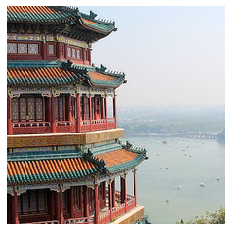

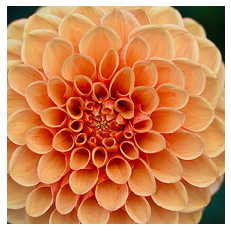

In [12]:
# cropped

images_resized = tf.image.resize_with_crop_or_pad(images, 224, 224)
plot_color_image(images_resized[0])
plt.show()
plot_color_image(images_resized[1])
plt.show()

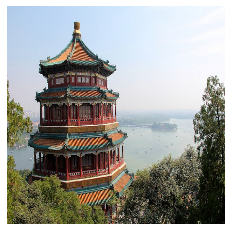

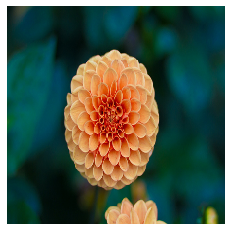

In [13]:
# proportionate resizing

images_resized = tf.image.resize(images, [224, 224]) # resize for model inputs.
plot_color_image(images_resized[0])
plt.show()
plot_color_image(images_resized[1])
plt.show()